In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re 
import string 
import nltk 
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer as CV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')
from IPython.display import display




[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Loading Data

In [2]:
train_df = pd.read_csv('train_data.txt', sep=':::', names=["title", "genre", "description"], engine='python')
test_df = pd.read_csv('test_data.txt', sep=':::', names=["title", "description"], engine='python')


# Data Visualizaion

In [3]:
train_df.head()

,title,genre,description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [4]:
test_df.head()

,title,description
1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
5,Er nu zhai (1955),Before he was known internationally as a mart...


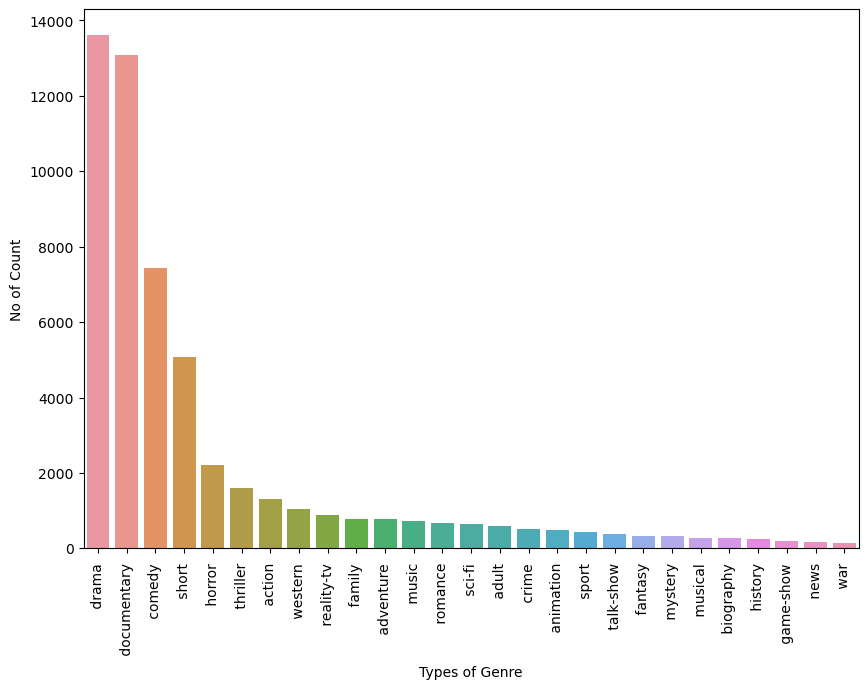

In [5]:
plt.figure(figsize=(10,7))
counts = train_df.genre.value_counts()
sns.barplot(x=counts.index, y=counts)
plt.xlabel('Types of Genre')
plt.ylabel('No of Count')
plt.xticks(rotation=90);

In [6]:
train_df.describe()

,title,genre,description
count,54214,54214,54214
unique,54214,27,54086
top,Oscar et la dame rose (2009),drama,Grammy - music award of the American academy ...
freq,1,13613,12


In [7]:
train_df.genre.value_counts()

genre
 drama           13613
 documentary     13096
 comedy           7447
 short            5073
 horror           2204
 thriller         1591
 action           1315
 western          1032
 reality-tv        884
 family            784
 adventure         775
 music             731
 romance           672
 sci-fi            647
 adult             590
 crime             505
 animation         498
 sport             432
 talk-show         391
 fantasy           323
 mystery           319
 musical           277
 biography         265
 history           243
 game-show         194
 news              181
 war               132
Name: count, dtype: int64

# Data Cleaning & Preprocessing

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        54214 non-null  object
 1   genre        54214 non-null  object
 2   description  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [9]:
train_df.isnull().sum()

title          0
genre          0
description    0
dtype: int64

In [10]:
train_df.duplicated().sum()

0

In [11]:
train_df.shape

(54214, 3)

In [12]:
train_df = train_df.drop_duplicates()
train_df.shape

(54214, 3)

In this dataset not null values and duplicate values are preset.

# Text Cleaning

In [13]:
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download()

In [14]:
stop_words = set(stopwords.words('english')) # stop words
def clean_data(text):
    text = text.lower()
    text = re.sub(r'@\S+','',text)                       # [1] remove mentions
    text = re.sub(r'http\S+', '', text)                  # [2] remove urls
    text = re.sub(r'[\w\.-]+@[\w\.-]+',"",text)          # [3] remove emails
    text = re.sub(r"[^a-zA-Z+']", ' ', text)             # [4] keep only english chars / remove numbers
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text+' ')      # [5] remove single chars
    text = re.sub(r'pic.\S+', '',text)                   # [6]
    text = re.sub(r'#', "", text)                        # [7] remove hashtags
    text = re.sub(r"_", "  ", text)                      # [8] remove hashtags
    text = re.sub('\n'," . ",text)                       # [9] remove new lines
    text = re.sub('\[[^]]*\]','',text)                   # [10] remove square prackets
    text = "".join([char for char in text if char not in string.punctuation]) # [11] remove punctuations
    text= re.sub("\s[\s]+", " ",text).strip()            # [12] remove repeated/leading/trailing spaces
    tokens = word_tokenize(text)                         # [13] Tokenize
    text = " ".join([word for word in tokens if word not in stop_words and len(word) > 2]) # [14] remove stop words
    
    return text

# Some Data Statistics

In [15]:
train_df['description'].apply(clean_data)

1        listening conversation doctor parents year old...
2        brother sister past incestuous relationship cu...
3        bus empties students field trip museum natural...
4        help unemployed father make ends meet edith tw...
5        films title refers recovered bodies ground zer...
                               ...                        
54210    short lived nbc live sitcom centered bonino wo...
54211    next generation exploitation sisters kapa bay ...
54212    bestaan echt stand comedy growing facing fears...
54213    walter vivian live country difficult time keep...
54214    labor day weekend intense hurricane ever make ...
Name: description, Length: 54214, dtype: object

In [16]:
train_df['description_cleaned'] = train_df['description'].apply(clean_data)
test_df['description_cleaned'] = test_df['description'].apply(clean_data)

In [17]:
st = PorterStemmer()
train_df['description_cleaned'] = train_df['description_cleaned'].apply(
    lambda x: ' '.join([st.stem(word) for word in x.split()]))

test_df['description_cleaned'] = test_df['description_cleaned'].apply(
    lambda x: ' '.join([st.stem(word) for word in x.split()]))


In [18]:
train_df['length']=train_df['description'].apply(len)
train_df['length_cleaned']=train_df['description_cleaned'].apply(len)
train_df.head()

,title,genre,description,description_cleaned,length,length_cleaned
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,listen convers doctor parent year old oscar le...,546,339
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,brother sister past incestu relationship curre...,184,111
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,bu empti student field trip museum natur histo...,650,344
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,help unemploy father make end meet edith twin ...,1082,678
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,film titl refer recov bodi ground zero also st...,625,347


In [19]:
print("Average Length of Text Before Cleaning: ", train_df['length'].mean())
print("Average Length of Text After Cleaning: ", train_df['length_cleaned'].mean())

Average Length of Text Before Cleaning:  600.4524292618142
Average Length of Text After Cleaning:  360.2900542295348


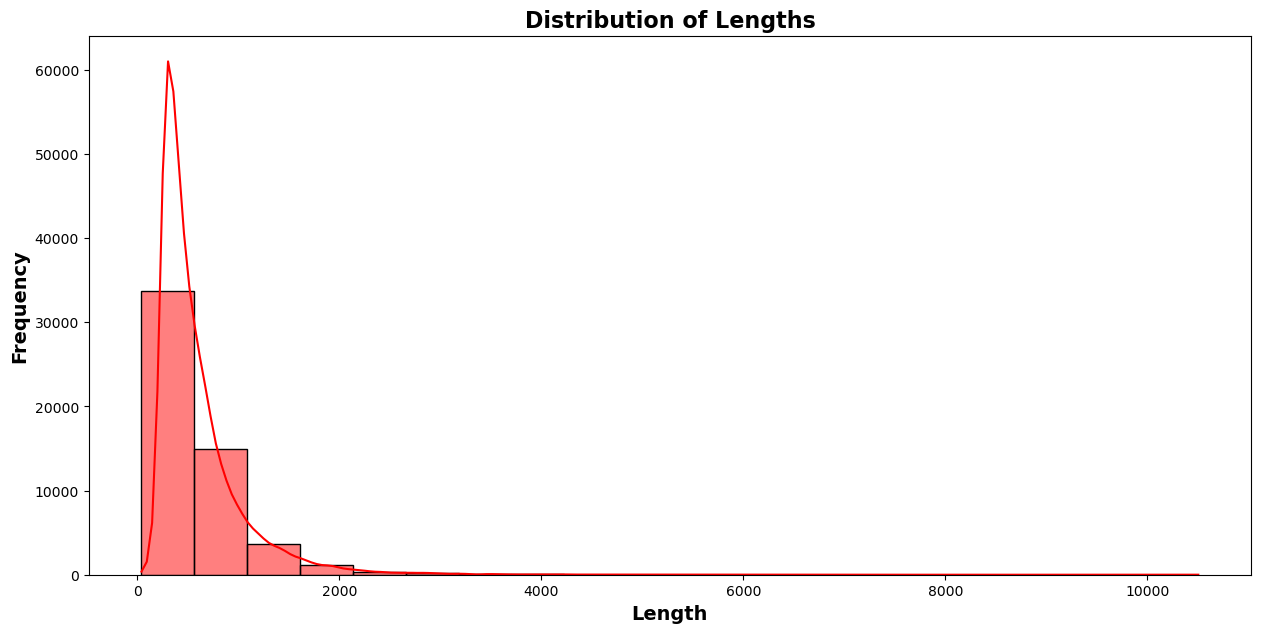

In [20]:
plt.figure(figsize=(15, 7))

sns.histplot(data=train_df, x='length', bins=20, kde=True, color='red')

plt.xlabel('Length', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.title('Distribution of Lengths', fontsize=16, fontweight='bold')

plt.show()

# Get Top bigrams

In [21]:
def get_top_n_bigram(corpus, n=None):
    vec = CV(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

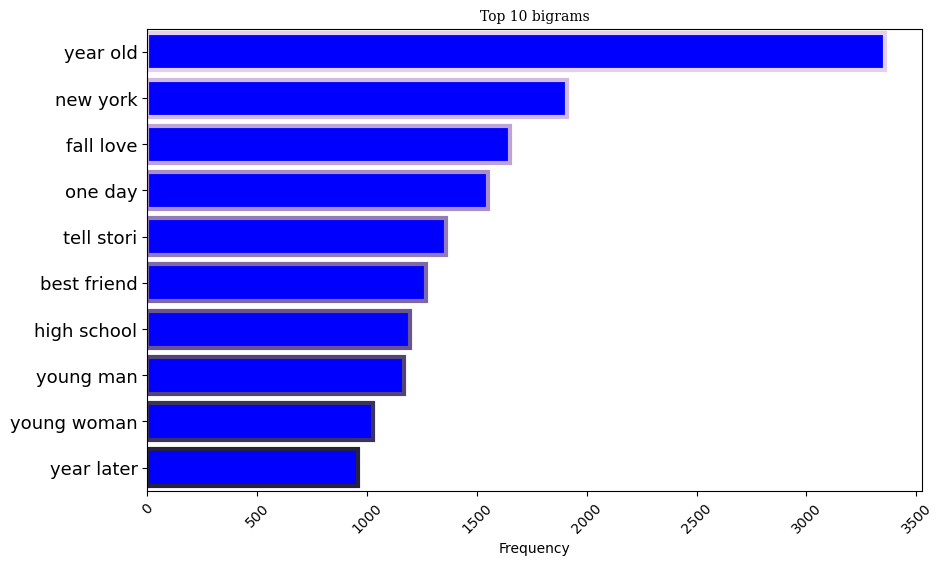

In [22]:
common_words = get_top_n_bigram(train_df['description_cleaned'], 10)
common_words_df = pd.DataFrame(common_words,columns=['word','freq'])
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='freq', y='word', data=common_words_df,facecolor='blue',linewidth=3,edgecolor=sns.color_palette("ch:start=3, rot=.1",10))

plt.title("Top 10 bigrams",font='Serif')
plt.xlabel("Frequency", fontsize=10)
plt.yticks(fontsize=13)
plt.xticks(rotation=45, fontsize=10)
plt.ylabel("");

# Label Encodeing of the Target variable

In [23]:
le = LabelEncoder()
train_df['genre'] = le.fit_transform(train_df['genre'].values)

train_df = train_df.loc[:,['description_cleaned', 'genre']]
test_df = test_df.loc[:,['description_cleaned', 'title']]
train_df.head(10)

,description_cleaned,genre
1,listen convers doctor parent year old oscar le...,8
2,brother sister past incestu relationship curre...,24
3,bu empti student field trip museum natur histo...,1
4,help unemploy father make end meet edith twin ...,8
5,film titl refer recov bodi ground zero also st...,8
6,qualiti control consist seri singl take shot f...,7
7,tough econom time max joey run idea discov sen...,5
8,ron petri keanu reev troubl teen whose life ha...,6
9,sudden calamit event caus great loss life dama...,18
10,four high school student embark terrifi journe...,13


# Train Test Split

In [24]:
train_set , val_set , train_label , val_label = train_test_split(train_df['description_cleaned'] , train_df['genre'] , test_size=0.2 , shuffle=True , random_state = 42)


# Feature Extraction

In [25]:
# using TF-IDF
vectorize = TfidfVectorizer(stop_words='english', max_features=100000)
train_set_tfidf = vectorize.fit_transform(train_set)
val_set_tfidf = vectorize.transform(val_set)

In [26]:
# using BOW
vectorize = CV()
train_set_tfidf = vectorize.fit_transform(train_set)
val_set_tfidf = vectorize.transform(val_set)

TF-IDF gets more accurate results in LR

# [1] Logistic Regression Model (LR)

In [31]:
lr_model = LogisticRegression()
lr_model.fit(train_set_tfidf, train_label)
predict_lr = lr_model.predict(val_set_tfidf)
print(classification_report(val_label, predict_lr))
lr_accuracy = accuracy_score(predict_lr,val_label)
print('Logistic Regression accuracy is: {:.2f}%'.format(lr_accuracy*100))

              precision    recall  f1-score   support

           0       0.39      0.30      0.34       263
           1       0.68      0.46      0.55       112
           2       0.31      0.23      0.26       139
           3       0.38      0.22      0.28       104
           4       0.00      0.00      0.00        61
           5       0.51      0.56      0.53      1443
           6       0.26      0.10      0.15       107
           7       0.69      0.76      0.73      2659
           8       0.55      0.67      0.61      2697
           9       0.28      0.19      0.23       150
          10       0.23      0.07      0.10        74
          11       0.80      0.50      0.62        40
          12       0.07      0.02      0.03        45
          13       0.63      0.61      0.62       431
          14       0.53      0.53      0.53       144
          15       0.22      0.08      0.12        50
          16       0.11      0.04      0.05        56
          17       0.18    

C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# [2] Multinomial Naive Bayes Model (MultinomialNB)

In [32]:
# Train a Naive Bayes classifier
NB_model = MultinomialNB()
NB_model.fit(train_set_tfidf, train_label)
y_pred_naive = NB_model.predict(val_set_tfidf)
print(classification_report(val_label, y_pred_naive))
naive_accuracy = accuracy_score(y_pred_naive,val_label)
print('Naive Bayes model accuracy is: {:.2f}%'.format(naive_accuracy*100))

              precision    recall  f1-score   support

           0       0.72      0.08      0.14       263
           1       0.60      0.05      0.10       112
           2       0.33      0.06      0.10       139
           3       0.00      0.00      0.00       104
           4       0.00      0.00      0.00        61
           5       0.51      0.50      0.50      1443
           6       0.00      0.00      0.00       107
           7       0.57      0.88      0.69      2659
           8       0.47      0.80      0.59      2697
           9       0.50      0.01      0.01       150
          10       0.00      0.00      0.00        74
          11       1.00      0.07      0.14        40
          12       0.00      0.00      0.00        45
          13       0.74      0.36      0.49       431
          14       0.75      0.12      0.21       144
          15       0.00      0.00      0.00        50
          16       0.00      0.00      0.00        56
          17       0.00    

C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# [3] Support Vector Machine Model (SVC)

In [41]:
# Train a SVC classifier
from sklearn.svm import LinearSVC
svm_model = LinearSVC()
svm_model.fit(train_set_tfidf, train_label)
predict = svm_model.predict(val_set_tfidf)

print(classification_report(val_label, predict))
svm_accuracy = accuracy_score(predict,val_label)
print('SVC model accuracy is: {:.2f}%'.format(svm_accuracy*100))

C:\Users\user\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.36      0.31      0.33       263
           1       0.47      0.38      0.42       112
           2       0.22      0.19      0.20       139
           3       0.27      0.16      0.20       104
           4       0.03      0.02      0.02        61
           5       0.48      0.51      0.49      1443
           6       0.14      0.09      0.11       107
           7       0.68      0.68      0.68      2659
           8       0.52      0.58      0.55      2697
           9       0.21      0.18      0.20       150
          10       0.19      0.11      0.14        74
          11       0.69      0.55      0.61        40
          12       0.06      0.02      0.03        45
          13       0.56      0.56      0.56       431
          14       0.51      0.54      0.53       144
          15       0.11      0.10      0.11        50
          16       0.09      0.07      0.08        56
          17       0.06    

C:\Users\user\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
